In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [4]:
x = np.array([168,428,296,392,80,56,352,444,168,200,4,52,20,228,72])
y = np.array([272,300,311,365,167,149,366,310,192,229,88,118,62,319,193])

Text(0, 0.5, 'Cars Sold')

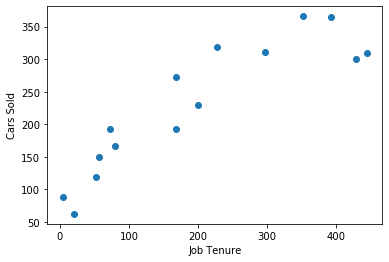

In [5]:
plt.scatter(x,y)
plt.xlabel("Job Tenure")
plt.ylabel("Cars Sold")

In [6]:
X = x.reshape(-1,1)
Y = y.reshape(-1,1)
lreg = LinearRegression()
lreg.fit(X, y)
print(lreg.intercept_, lreg.coef_)

114.49632475015463 [0.58228214]


In [7]:
print("R2 Score :", lreg.score(X, y))
y_pred = lreg.predict(X)
r2 = r2_score(Y, y_pred)
print("R2 Score :", r2)
adj_r2 = (1 - (1 - r2) * ((X.shape[0] - 1) / 
          (X.shape[0] - X.shape[1] - 1)))
print("Adj R2: ", adj_r2)
mse = np.mean((y_pred - y)**2)
print("MSE: ", mse)
print("MSE: %.2f" % mean_squared_error(y, y_pred))
print("RMSE/Standard Error: %.2f" % mean_squared_error(y, y_pred, squared=False))
print("MAE: ", np.mean(abs(y - y_pred)))

R2 Score : 0.8019274393312876
R2 Score : 0.8019274393312876
Adj R2:  0.7866910885106174
MSE:  1829.366478726521
MSE: 1829.37
RMSE/Standard Error: 42.77
MAE:  35.83434226374556


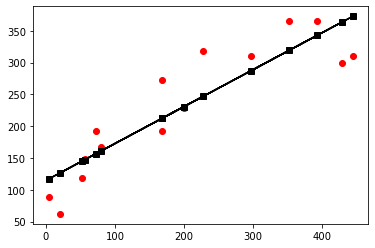

In [18]:
plt.scatter(X, Y, color='red')
plt.plot(X, y_pred, color='black', marker='s')

AttributeError: 'function' object has no attribute 'qqplot'

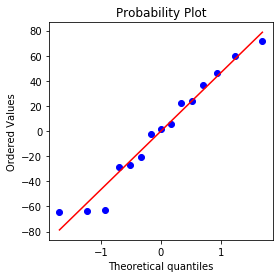

In [9]:
# QQ plot
#This plot depicts whether the residuals(errors) are normally distributed or not. 
#If the points lie close to the normal line then residuals are assumed to be normally distributed.
residuals = y - y_pred
plt.figure(figsize=(4,4))
stats.probplot(residuals, dist="norm", plot=plt)
fig = stats.probplot.qqplot()

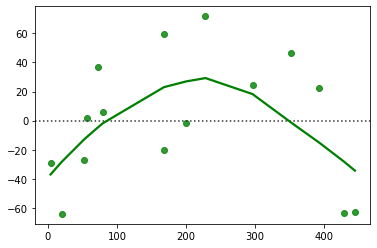

In [10]:
#Residual plot
#If the plot depicts any specific or regular pattern then it is assumed the relation 
#between the target variable and predictors is non-linear in nature i.e. non-linearity exists.
#No pattern in the curve is a sign of linearity 
sns.residplot(X, Y, lowess=True, color="g")

[7.72530103 7.98204735 4.91407798 4.71689274 2.43333191 1.37690796
 6.82204974 7.93911797 4.50774045 1.39740916 5.36893409 5.1744561
 8.00886805 8.47014449 6.04808741]


Text(0.5, 0, 'Fitted value')

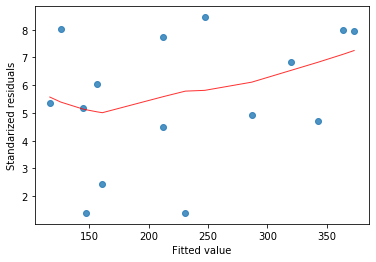

In [11]:
#Scale-location plot
#If it depicts no specific pattern then the fitted regression model upholds homoscedasticity assumption
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(residuals))
print(model_norm_residuals_abs_sqrt)
sns.regplot(y_pred.reshape(-1), model_norm_residuals_abs_sqrt,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")

In [12]:
#Leverage plot
#It is used to guess the impact of outliers over the regression fit
#statsmodels 

In [13]:
#Polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(X).astype(int)
model = LinearRegression()
model.fit(x_poly, Y)
y_poly_pred = model.predict(x_poly)
print(model.intercept_, model.coef_)
print("RMSE/Standard Error: %.2f" % mean_squared_error(Y, y_poly_pred, squared=False))
print("R2 Score :", r2_score(Y, y_poly_pred))

[63.85096934] [[ 0.          1.40945254 -0.00185215]]
RMSE/Standard Error: 29.23
R2 Score : 0.9075203597474754


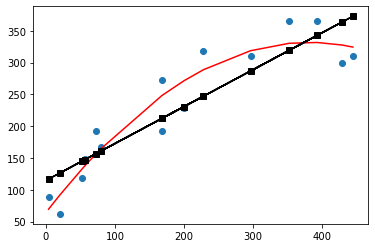

In [14]:
import operator
plt.scatter(X, Y)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,y_poly_pred), key=sort_axis)
x_poly_order, y_poly_pred_order = zip(*sorted_zip)
plt.plot(x_poly_order, y_poly_pred_order, color="red") #Best fit polynomial reg
plt.plot(X, y_pred, color='black', marker='s')  #Best fit linear reg

Text(0, 0.5, 'Cars sold')

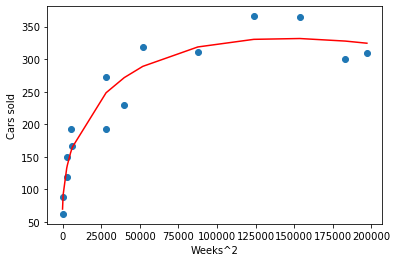

In [15]:
x2_poly_column = x_poly[:,2].reshape(-1)
plt.scatter(x2_poly_column, Y)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x2_poly_column,y_poly_pred), key=sort_axis)
x2_poly_order, y2_poly_pred_order = zip(*sorted_zip)
plt.plot(x2_poly_order, y2_poly_pred_order, color="red") #Best fit polynomial reg
plt.xlabel("Weeks^2")
plt.ylabel("Cars sold")

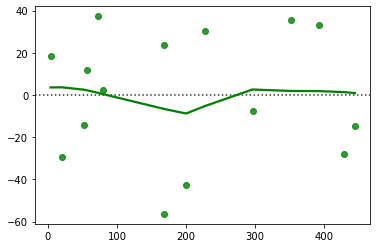

In [16]:
residuals_poly = y - y_poly_pred.reshape(-1)
#plt.figure(figsize=(4,4))
#stats.probplot(residuals_poly, dist="norm", plot=plt)
sns.residplot(X, residuals_poly, lowess=True, color="g")